In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from util import BruxKori, Kinetic
import math

In [2]:
data_pd = pd.read_csv('kkm_data.csv', delimiter=";")
pc = data_pd.columns[6:]

data = {}
for i in range(data_pd.shape[0]):
    data[int(data_pd["Лабораторный №"][i])] = {"kpr": float(data_pd["Кпр, мД"][i]),
                                               "kp": float(data_pd["Кп, %"][i]),
                                               "kv": [float(i) for i in data_pd.loc[i][pc].tolist()]}
pc = [float(i) for i in pc]

In [3]:
data_pd

Месторождение  Скв. Пласт  Лабораторный №  Кпр, мД  Кп, %  0.001  0.016  \
0       Чудесное     1  VI-2               1     38.0   36.5    100  96.13   
1       Чудесное     1  VI-2               2     16.8   35.8    100  96.28   
2       Чудесное     1  VI-2               3     12.3   34.0    100  97.49   
3       Чудесное     1  VI-2               4     51.0   36.8    100  94.43   
4       Чудесное     1  VI-2               5     38.0   37.0    100  94.70   
..           ...   ...   ...             ...      ...    ...    ...    ...   
75      Чудесное     1   XXI              78     98.0   31.7    100  96.55   
76      Чудесное     1   XXI              79     61.0   33.4    100  97.05   
77      Чудесное     1   XXI              80     78.0   32.3    100  97.93   
78      Чудесное     1   XXI              81     20.0   30.9    100  98.24   
79      Чудесное     1   XXI              82      0.3    6.0    100  98.57   

    0.027  0.047  0.081  0.139  0.238  0.406    0.7    1.2  
0   95.13  93.10  89.29  81.10  72.04  64.74  59.34  56.31  
1   95.40  94.50  92.40  88.74  79.58  71.16  65.42  62.01  
2   96.49  95.23  93.53  89.53  82.04  72.66  65.90  62.90  
3   93.40  91.48  85.23  75.49  66.59  60.40  56.40  54.30  
4   93.70  92.25  89.04  79.35  69.12  61.31  56.15  53.15  
..    ...    ...    ...    ...    ...    ...    ...    ...  
75  93.37  87.40  75.65  64.50  57.32  51.51  47.64  45.06  
76  95.18  91.91  81.45  70.48  62.03  55.69  51.52  48.96  
77  96.06  91.31  79.90  68.87  59.62  52.97  48.50  45.94  
78  97.04  95.84  92.84  86.33  78.82  72.87  67.93  64.93  
79  98.14  97.70  97.26  96.46  95.69  93.64  87.23  83.84  

[80 rows x 16 columns]

In [4]:
data

{1: {'kpr': 38.0,
  'kp': 36.5,
  'kv': [100.0, 96.13, 95.13, 93.1, 89.29, 81.1, 72.04, 64.74, 59.34, 56.31]},
 2: {'kpr': 16.8,
  'kp': 35.8,
  'kv': [100.0, 96.28, 95.4, 94.5, 92.4, 88.74, 79.58, 71.16, 65.42, 62.01]},
 3: {'kpr': 12.3,
  'kp': 34.0,
  'kv': [100.0, 97.49, 96.49, 95.23, 93.53, 89.53, 82.04, 72.66, 65.9, 62.9]},
 4: {'kpr': 51.0,
  'kp': 36.8,
  'kv': [100.0, 94.43, 93.4, 91.48, 85.23, 75.49, 66.59, 60.4, 56.4, 54.3]},
 5: {'kpr': 38.0,
  'kp': 37.0,
  'kv': [100.0, 94.7, 93.7, 92.25, 89.04, 79.35, 69.12, 61.31, 56.15, 53.15]},
 6: {'kpr': 165.0,
  'kp': 38.4,
  'kv': [100.0, 97.2, 94.89, 87.19, 74.05, 61.29, 51.32, 43.95, 38.44, 34.54]},
 7: {'kpr': 19.4,
  'kp': 36.3,
  'kv': [100.0,
   97.03,
   96.03,
   94.74,
   92.08,
   85.11,
   74.04,
   65.66,
   59.26,
   54.67]},
 8: {'kpr': 42.0,
  'kp': 36.3,
  'kv': [100.0,
   94.22,
   93.22,
   91.54,
   87.09,
   75.56,
   63.86,
   54.65,
   48.12,
   45.12]},
 9: {'kpr': 39.0,
  'kp': 34.5,
  'kv': [100.0,
   94.6

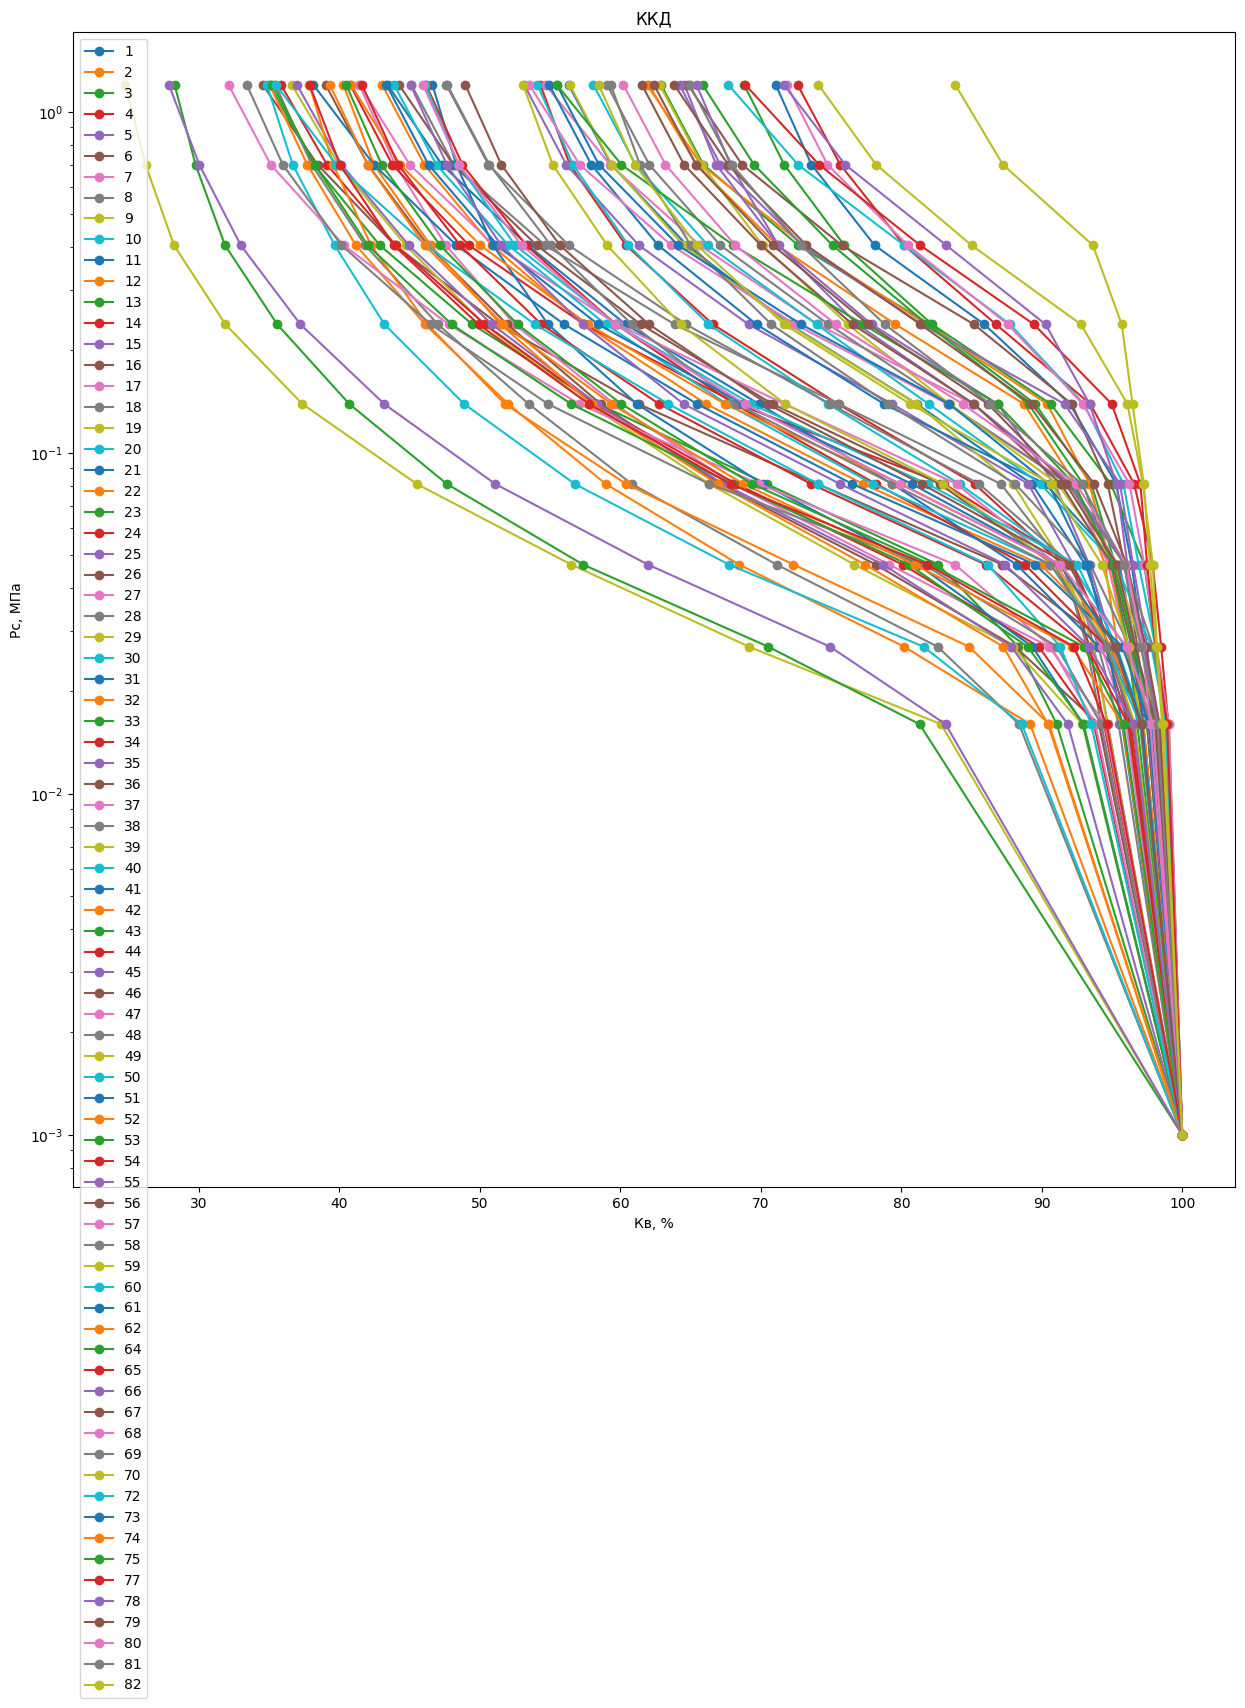

In [5]:
fig, ax = plt.subplots(figsize=(15,15))

for num in data.keys():
    ax.plot(data[num]["kv"], pc, marker="o", label = num)
ax.set_xlabel('Кв, %')
ax.set_ylabel('Pc, МПа')
ax.set_yscale('log')
ax.set_title("ККД")
ax.legend()


In [ ]:
def plot_all_models(data, pc, model_name):
    """
    Function to iterate through all models, predict, and plot real and predicted curves.
    """
    num_models = len(data)
    num_cols = 4
    num_rows = math.ceil(num_models / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for idx, num in enumerate(data.keys()):
        match model_name:
            case "BruxKori":   
                model = BruxKori(data[num]["kv"], pc)
            case "Kinetic":
                model = Kinetic(data[num]["kv"], pc)
            case "Optimal":
                pass
            case "Tomira":
                pass
            case "Trigonometric":
                pass
            
        predicted = model.predict()
        real = model.kv
        
        ax = axes[idx]
        ax.plot(real, pc, marker="o", linestyle="-", label="Real")
        ax.plot(predicted, pc, marker="o", linestyle="--", label="Predicted")
        
        ax.set_xlabel("Kv, %")
        ax.set_ylabel("Pc, МПа")
        ax.set_yscale("log")
        ax.set_title(f"Model {num}")
        ax.legend()
    
    # Hide unused subplots
    for ax in axes[num_models:]:
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

f:\_Artemiy data\MSU\5 курс\2 семестр\Petroleum\Pertoleum-Geology-Projects\Artemiy_Fishchuk_examples\03 Capilarry curve modeling\util.py:42: RuntimeWarning: divide by zero encountered in divide
  pred_kv = self._compute(n, mask)
f:\_Artemiy data\MSU\5 курс\2 семестр\Petroleum\Pertoleum-Geology-Projects\Artemiy_Fishchuk_examples\03 Capilarry curve modeling\util.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  pred_kv = self._compute(n, mask)


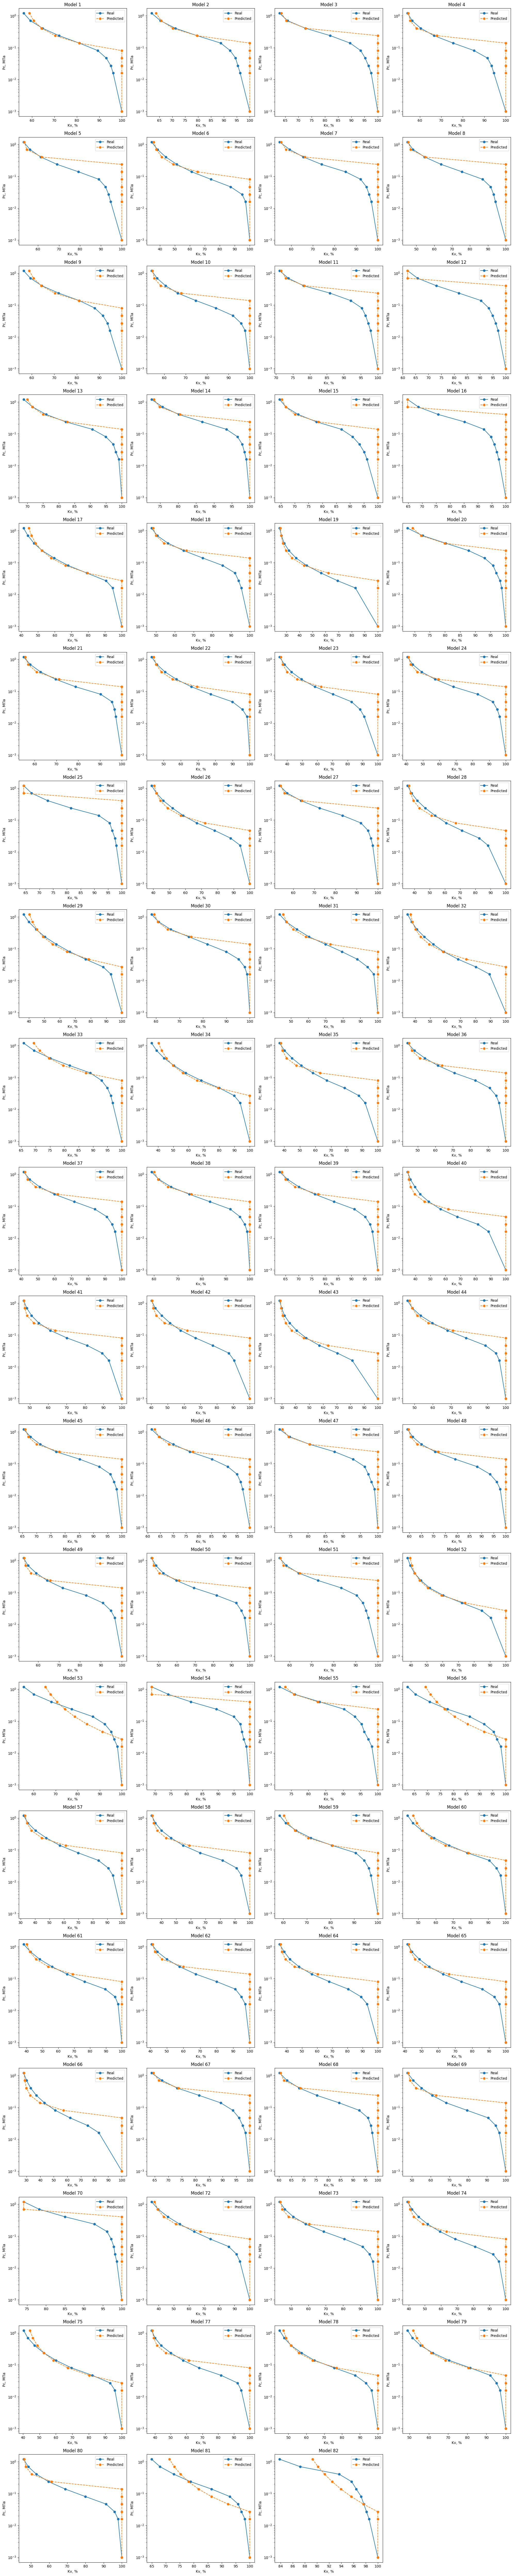

In [28]:
plot_all_models(data, pc, model_name="BruxKori")

f:\_Artemiy data\MSU\5 курс\2 семестр\Petroleum\Pertoleum-Geology-Projects\Artemiy_Fishchuk_examples\03 Capilarry curve modeling\util.py:42: RuntimeWarning: divide by zero encountered in divide
  return self.kvo+(100-self.kvo)*(self.pc_vh/self.pc[mask])**(1/n)
f:\_Artemiy data\MSU\5 курс\2 семестр\Petroleum\Pertoleum-Geology-Projects\Artemiy_Fishchuk_examples\03 Capilarry curve modeling\util.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  return self.kvo+(100-self.kvo)*(self.pc_vh/self.pc[mask])**(1/n)


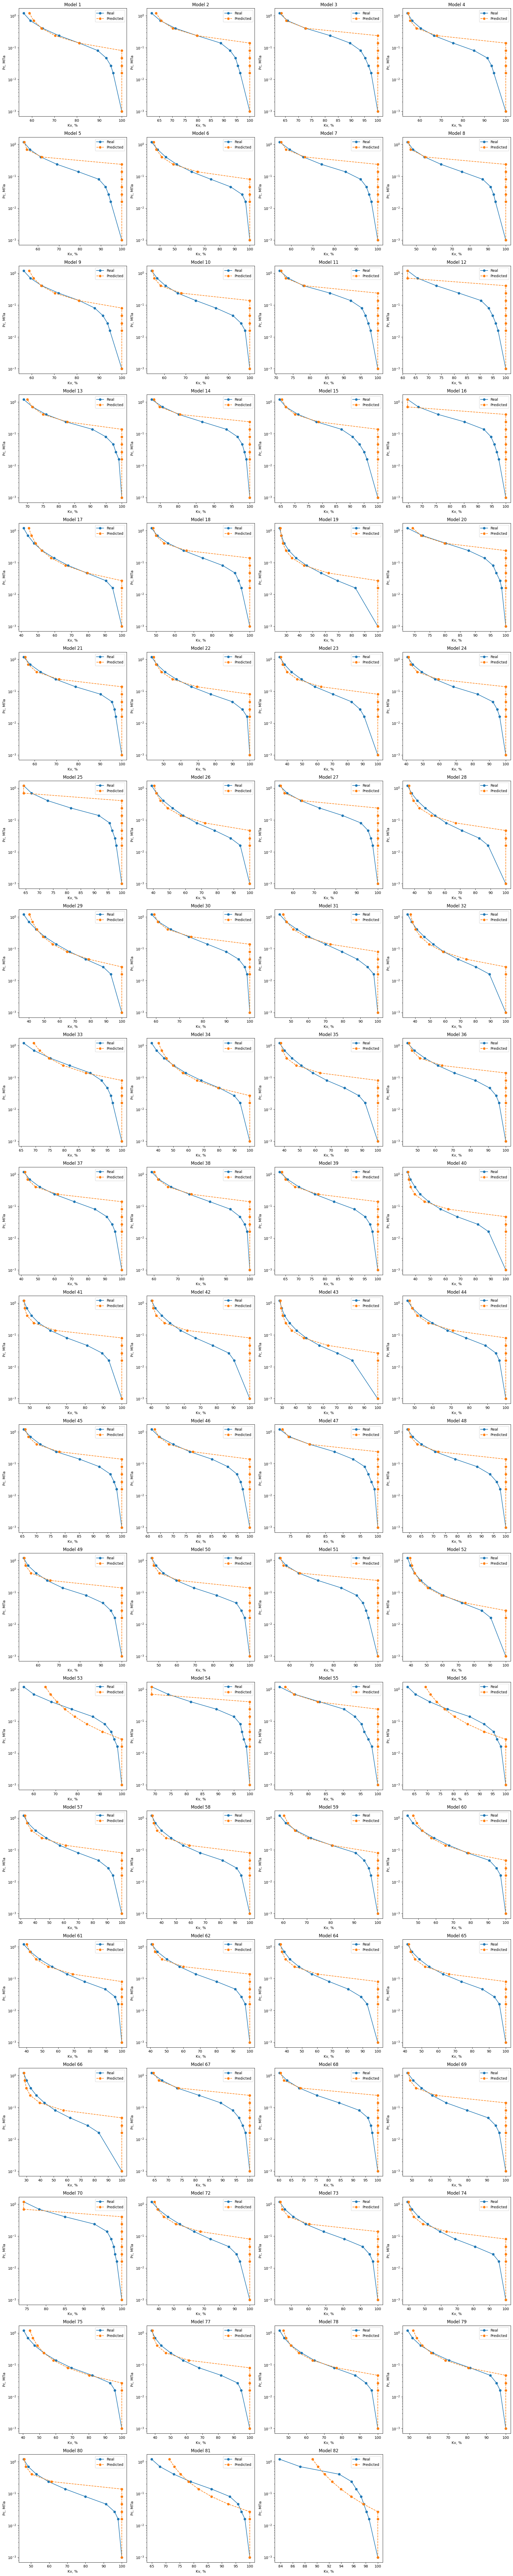

In [7]:
plot_all_models(data, pc, model_name="Kinetic")